<a href="https://colab.research.google.com/github/OrcaShamuDeluxeU/BoardGames/blob/main/stock.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
!pip install  yfinance
import yfinance as yf

     |████████████████████████████████| 5.5MB 8.5MB/s 
  Created wheel for yfinance: filename=yfinance-0.1.55-py2.py3-none-any.whl size=22616 sha256=20eba8cc57ce9bddf09b76507e48cd9ac15ea4aff6929b51c80b8111a4622b78
  Stored in directory: /root/.cache/pip/wheels/04/98/cc/2702a4242d60bdc14f48b4557c427ded1fe92aedf257d4565c
Successfully built yfinance
  Found existing installation: lxml 4.2.6
    Uninstalling lxml-4.2.6:
      Successfully uninstalled lxml-4.2.6


# Infrastructure Code


In [74]:
import collections

Position = collections.namedtuple('shares', 'name age gender')
class Position:
  def __init__(self, shares, purchase_price):
    self.shares = [(shares, purchase_price)]
  def add_to_position(new_shares, purchase_price):
    self.shares.append((new_shares, purchase_price))
  def reduce_position(shares_to_sell, sell_price):
    # Assume sell from the earliest purchase first.
    # TODO: add more sales strategies.
    #if shares_to_sell
    sales = shares_to_sell * sell_price
    return sales


class Policy:
  def __init__(self, ticker):
    self.ticker = ticker


TICKERS_OF_INTEREST = "SPY AAPL MSFT AMZN GOOG FB"

class BacktestEngine:
  def __init__(self, start_time, end_time, init_cash, tickers=TICKERS_OF_INTEREST, time_granularity="90m"):
    self.init_cash = init_cash
    self.position = dict()  # keyed by ticker symblols, valued as Position
    self.start_time = start_time
    self.end_time = end_time
    self.tickers = tickers #"SPY AAPL MSFT"
    self.time_granularity = time_granularity # 1m,2m,5m,15m,30m,60m,90m,1h,1d,5d,1wk,1mo,3mo
  def get_hist(self):    
    data = yf.download(  # or pdr.get_data_yahoo(...
        # tickers list or string as well
        tickers = self.tickers,

        # use "period" instead of start/end
        # valid periods: 1d,5d,1mo,3mo,6mo,1y,2y,5y,10y,ytd,max
        # (optional, default is '1mo')
        period = "ytd",

        # fetch data by interval (including intraday if period < 60 days)
        # valid intervals: 1m,2m,5m,15m,30m,60m,90m,1h,1d,5d,1wk,1mo,3mo
        # (optional, default is '1d')
        interval = self.time_granularity,

        # group by ticker (to access via data['SPY'])
        # (optional, default is 'column')
        #group_by = 'ticker',

        # adjust all OHLC automatically
        # (optional, default is False)
        auto_adjust = True,

        # download pre/post regular market hours data
        # (optional, default is False)
        prepost = True,

        # use threads for mass downloading? (True/False/Integer)
        # (optional, default is True)
        threads = True,

        # proxy URL scheme use use when downloading?
        # (optional, default is None)
        proxy = None
    )
    return data
  def run_test(self, policy):
    hist = self.get_hist()
    print(hist.columns)


In [75]:
test_engine = BacktestEngine(start_time=0, end_time=100, init_cash=10000)
test_engine.run_test(policy=None)

[*********************100%***********************]  6 of 6 completed
MultiIndex([( 'Close', 'AAPL'),
            ( 'Close', 'AMZN'),
            ( 'Close',   'FB'),
            ( 'Close', 'GOOG'),
            ( 'Close', 'MSFT'),
            ( 'Close',  'SPY'),
            (  'High', 'AAPL'),
            (  'High', 'AMZN'),
            (  'High',   'FB'),
            (  'High', 'GOOG'),
            (  'High', 'MSFT'),
            (  'High',  'SPY'),
            (   'Low', 'AAPL'),
            (   'Low', 'AMZN'),
            (   'Low',   'FB'),
            (   'Low', 'GOOG'),
            (   'Low', 'MSFT'),
            (   'Low',  'SPY'),
            (  'Open', 'AAPL'),
            (  'Open', 'AMZN'),
            (  'Open',   'FB'),
            (  'Open', 'GOOG'),
            (  'Open', 'MSFT'),
            (  'Open',  'SPY'),
            ('Volume', 'AAPL'),
            ('Volume', 'AMZN'),
            ('Volume',   'FB'),
            ('Volume', 'GOOG'),
            ('Volume', 'MSFT'),
   

# Basic Stats

In [13]:
# https://pypi.org/project/yfinance/
https://github.com/ranaroussi/yfinance
https://aroussi.com/post/python-yahoo-finance
https://github.com/ThamuMnyulwa/PythonForFinance/blob/master/yfinanceAPIanalysis.ipynb
data = yf.download("SPY AAPL", start="2017-01-01", end="2017-04-30")

[*********************100%***********************]  2 of 2 completed


In [47]:
msft = yf.Ticker("MSFT")

qe = msft.info

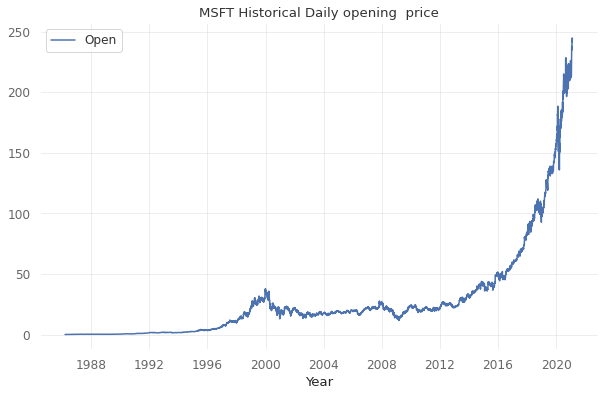

In [49]:
import matplotlib.pyplot as plt
hist = msft.history(period="max")
hist.head()
plt.plot(hist["Open"],label="Open")
plt.legend(loc="best")
plt.xlabel("Price")
plt.xlabel("Year")
plt.title(msft.info['symbol'] + " Historical Daily opening  price")
plt.show()


In [52]:
hist

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
1986-03-13,0.056367,0.064656,0.056367,0.061893,1031788800,0.0,0.0
1986-03-14,0.061893,0.065209,0.061893,0.064103,308160000,0.0,0.0
1986-03-17,0.064103,0.065762,0.064103,0.065209,133171200,0.0,0.0
1986-03-18,0.065209,0.065762,0.062998,0.063551,67766400,0.0,0.0
1986-03-19,0.063551,0.064103,0.061893,0.062445,47894400,0.0,0.0
...,...,...,...,...,...,...,...
2021-02-08,243.149994,243.679993,240.809998,242.470001,22211900,0.0,0.0
2021-02-09,241.869995,244.759995,241.380005,243.770004,23565000,0.0,0.0
2021-02-10,245.000000,245.919998,240.889999,242.820007,22186700,0.0,0.0


# Analysis

In [44]:
#https://github.com/ranaroussi/quantstats
%matplotlib inline
!pip install quantstats
import quantstats as qs

  Created wheel for quantstats: filename=QuantStats-0.0.26-py2.py3-none-any.whl size=36979 sha256=8a50d50d37d714e3cb0dbafe36b55c9e4f7492849f690974aece22457da18589
  Stored in directory: /root/.cache/pip/wheels/e2/29/82/c3cdde9eb76e7ed91e6aff057e4a53f52a7226c0eb09df90e0
Successfully built quantstats


In [59]:
# extend pandas functionality with metrics, etc.
qs.extend_pandas()

# fetch the daily returns for a stock
stock = qs.utils.download_returns('FB')

# show sharpe ratio
qs.stats.sharpe(stock)

# or using extend_pandas() :)
stock.sharpe()

0.7853321528368443

In [60]:
stock.expected_return()

0.0008901875064972753

findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.


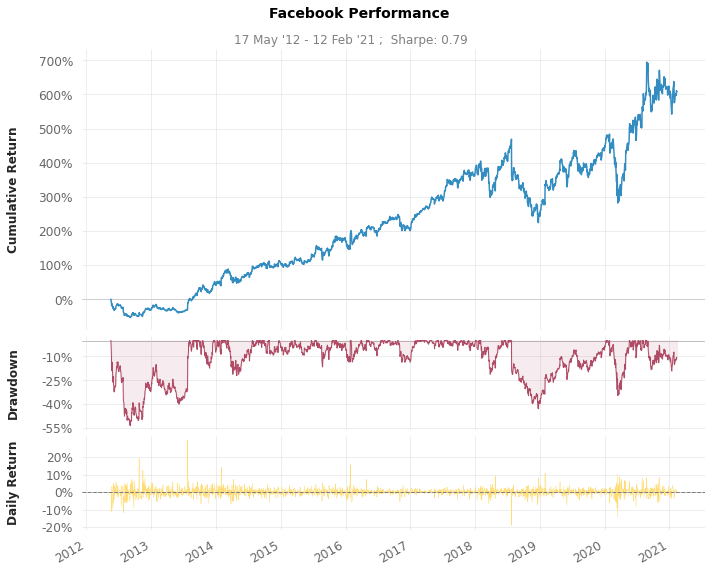

In [46]:
qs.plots.snapshot(stock, title='Facebook Performance')

# can also be called via:
# stock.plot_snapshot(title='Facebook Performance')

[Performance Metrics]

                           Strategy    Benchmark
-------------------------  ----------  -----------
Start Period               2012-05-18  2012-05-18
End Period                 2021-02-12  2021-02-12
Risk-Free Rate             0.0%        0.0%
Time in Market             100.0%      100.0%

Cumulative Return          607.56%     257.04%
CAGR%                      25.07%      15.67%
Sharpe                     0.79        0.96
Sortino                    1.19        1.34
Max Drawdown               -53.62%     nan%
Longest DD Days            -           -
Volatility (ann.)          37.34%      16.6%
R^2                        0.23        0.23
Calmar                     0.47        0.46
Skew                       0.96        -0.71
Kurtosis                   18.75       18.09

Expected Daily %           0.09%       0.06%
Expected Monthly %         1.86%       1.21%
Expected Yearly %          21.61%      13.57%
Kelly Criterion            4.84%       6.55%
Risk of Ruin   

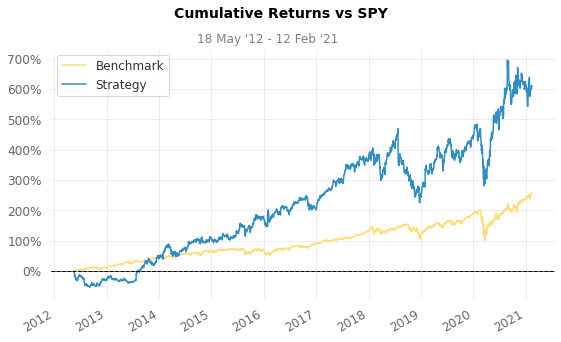

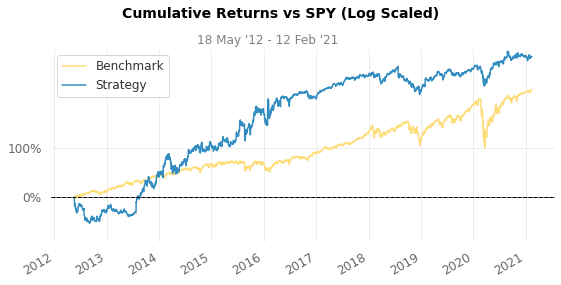

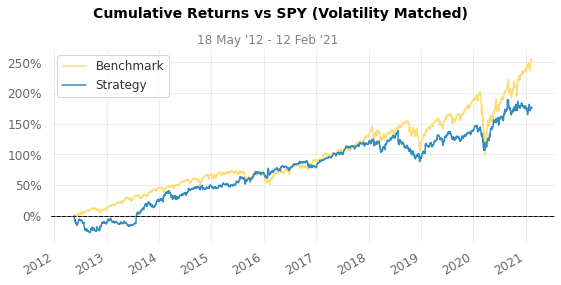

TypeError: ignored

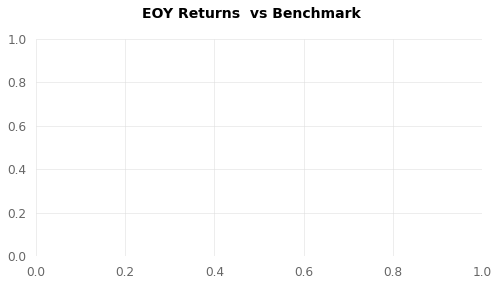

In [62]:
qs.reports.full(stock, "SPY")

In [63]:
[f for f in dir(qs.stats) if f[0] != '_']

['avg_loss',
 'avg_return',
 'avg_win',
 'best',
 'cagr',
 'calmar',
 'common_sense_ratio',
 'comp',
 'compare',
 'compsum',
 'conditional_value_at_risk',
 'consecutive_losses',
 'consecutive_wins',
 'cpc_index',
 'cvar',
 'drawdown_details',
 'expected_return',
 'expected_shortfall',
 'exposure',
 'gain_to_pain_ratio',
 'geometric_mean',
 'ghpr',
 'greeks',
 'implied_volatility',
 'information_ratio',
 'kelly_criterion',
 'kurtosis',
 'max_drawdown',
 'monthly_returns',
 'outlier_loss_ratio',
 'outlier_win_ratio',
 'outliers',
 'payoff_ratio',
 'pct_rank',
 'profit_factor',
 'profit_ratio',
 'r2',
 'r_squared',
 'rar',
 'recovery_factor',
 'remove_outliers',
 'risk_of_ruin',
 'risk_return_ratio',
 'rolling_greeks',
 'ror',
 'sharpe',
 'skew',
 'sortino',
 'tail_ratio',
 'to_drawdown_series',
 'ulcer_index',
 'ulcer_performance_index',
 'upi',
 'value_at_risk',
 'var',
 'volatility',
 'win_loss_ratio',
 'win_rate',
 'worst']

In [42]:
print(qe.keys())

dict_keys(['zip', 'sector', 'fullTimeEmployees', 'longBusinessSummary', 'city', 'phone', 'state', 'country', 'companyOfficers', 'website', 'maxAge', 'address1', 'industry', 'previousClose', 'regularMarketOpen', 'twoHundredDayAverage', 'trailingAnnualDividendYield', 'payoutRatio', 'volume24Hr', 'regularMarketDayHigh', 'navPrice', 'averageDailyVolume10Day', 'totalAssets', 'regularMarketPreviousClose', 'fiftyDayAverage', 'trailingAnnualDividendRate', 'open', 'toCurrency', 'averageVolume10days', 'expireDate', 'yield', 'algorithm', 'dividendRate', 'exDividendDate', 'beta', 'circulatingSupply', 'startDate', 'regularMarketDayLow', 'priceHint', 'currency', 'trailingPE', 'regularMarketVolume', 'lastMarket', 'maxSupply', 'openInterest', 'marketCap', 'volumeAllCurrencies', 'strikePrice', 'averageVolume', 'priceToSalesTrailing12Months', 'dayLow', 'ask', 'ytdReturn', 'askSize', 'volume', 'fiftyTwoWeekHigh', 'forwardPE', 'fromCurrency', 'fiveYearAvgDividendYield', 'fiftyTwoWeekLow', 'bid', 'tradeabl

In [35]:
data = yf.download(  # or pdr.get_data_yahoo(...
        # tickers list or string as well
        tickers = "SPY AAPL MSFT",

        # use "period" instead of start/end
        # valid periods: 1d,5d,1mo,3mo,6mo,1y,2y,5y,10y,ytd,max
        # (optional, default is '1mo')
        period = "ytd",

        # fetch data by interval (including intraday if period < 60 days)
        # valid intervals: 1m,2m,5m,15m,30m,60m,90m,1h,1d,5d,1wk,1mo,3mo
        # (optional, default is '1d')
        interval = "90m",

        # group by ticker (to access via data['SPY'])
        # (optional, default is 'column')
        group_by = 'ticker',

        # adjust all OHLC automatically
        # (optional, default is False)
        auto_adjust = True,

        # download pre/post regular market hours data
        # (optional, default is False)
        prepost = True,

        # use threads for mass downloading? (True/False/Integer)
        # (optional, default is True)
        threads = True,

        # proxy URL scheme use use when downloading?
        # (optional, default is None)
        proxy = None
    )

[*********************100%***********************]  3 of 3 completed


In [38]:
data.AAPL.columns

Index(['Open', 'High', 'Low', 'Close', 'Volume'], dtype='object')

In [51]:
data

AAPL              ...         SPY          
                                 Open        High  ...       Close    Volume
Datetime                                           ...                      
2021-01-04 04:00:00-05:00  133.310000  134.010000  ...  376.600000         0
2021-01-04 05:30:00-05:00  133.590000  134.430000  ...  376.410000         0
2021-01-04 07:00:00-05:00  133.920000  134.100000  ...  376.010000         0
2021-01-04 08:30:00-05:00  133.790000  133.900000  ...  375.630000         0
2021-01-04 09:30:00-05:00  133.520004  133.611603  ...  369.980011  19847619
...                               ...         ...  ...         ...       ...
2021-02-12 14:00:00-05:00  134.270004  134.800003  ...  391.410004   6342760
2021-02-12 15:30:00-05:00  134.779999  135.529999  ...  392.690002  15000869
2021-02-12 16:00:00-05:00  135.340000  135.500000  ...  393.080000         0
2021-02-12 17:30:00-05:00  135.410000  135.480000  ...  393.080000         0
2021-02-12 19:00:00-05:00  135.360000  135.460000  ...  393.200000         0

[320 rows x 15 columns]